In [1]:
auth_token = "..."

In [2]:
import requests
import pandas as pd

def get_search(offset, auth_token):
    headers = {"authorization": auth_token}
    url = (
        "https://discord.com/api/v9/guilds/349436576037732353"
        "/messages/search"
        "?author_id=730758759743225908"
        "&content=obv"
        "&include_nsfw=true"
        f"&offset={offset}"
    )
    return requests.get(url, headers=headers)

res = get_search(0, auth_token).json()

In [5]:
from tqdm import tqdm
import itertools
import time

messages = []
for i in tqdm(range(20)):
    offset = i * 25
    search = get_search(offset, auth_token)
    messages += list(itertools.chain.from_iterable(search.json()['messages']))
    time.sleep(0.5)
print(len(messages))

100%|██████████| 20/20 [00:18<00:00,  1.06it/s]

463


In [6]:
df = pd.DataFrame(messages)
ts_df = df[["timestamp"]].copy()
ts_df["timestamp"] = pd.to_datetime(ts_df["timestamp"])
ts_df["date"] = ts_df["timestamp"].dt.date
ts_df["hour"] = (ts_df["timestamp"].dt.hour + ts_df["timestamp"].dt.minute / 60).round(2)
ts_df.to_csv("2023-08-29-curche-obv.csv", index=False)

In [7]:
ts_df

,timestamp,date,hour
0,2023-08-30 06:39:45.853000+00:00,2023-08-30,6.65
1,2023-08-30 06:33:14.652000+00:00,2023-08-30,6.55
2,2023-08-30 06:32:33.082000+00:00,2023-08-30,6.53
3,2023-08-30 06:22:57.861000+00:00,2023-08-30,6.37
4,2023-08-30 04:52:13.849000+00:00,2023-08-30,4.87
...,...,...,...
458,2021-05-08 06:40:04.651000+00:00,2021-05-08,6.67
459,2021-04-24 20:07:05.159000+00:00,2021-04-24,20.12
460,2021-04-15 08:18:26.173000+00:00,2021-04-15,8.30
461,2021-04-09 20:12:30.300000+00:00,2021-04-09,20.20


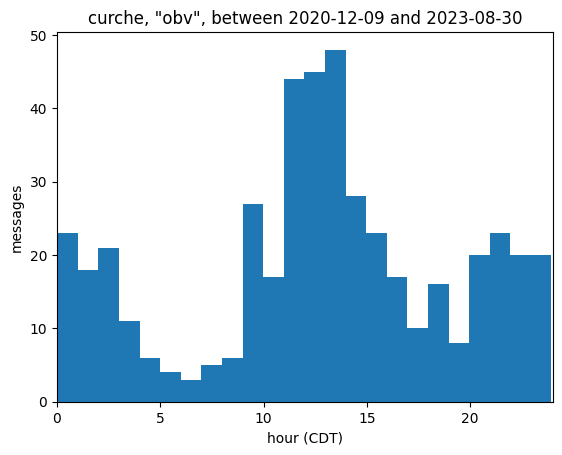

In [8]:
import matplotlib.pyplot as plt

plt.hist((ts_df.hour - 5) % 24, bins=24)
plt.title(f"curche, \"obv\", between {ts_df.date.min()} and {ts_df.date.max()}")
plt.xlim(0, 24)
plt.xlabel("hour (CDT)")
plt.ylabel("messages")
plt.show()

C:\Users\acmiy\AppData\Local\Temp\ipykernel_4376\827089589.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ts_df["month"] = ts_df["timestamp"].dt.to_period("M")


Text(0.5, 1.0, 'curche, "obv", between 2020-12-09 and 2023-08-30')

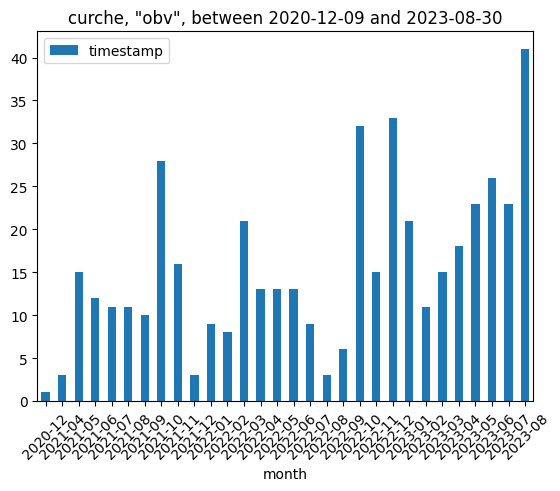

In [11]:
# group by date truncated to month
ts_df["month"] = ts_df["timestamp"].dt.to_period("M")
ts_df.groupby("month").count().plot(kind="bar", y="timestamp")
# rotate x labels
plt.xticks(rotation=45)
plt.title(f"curche, \"obv\", between {ts_df.date.min()} and {ts_df.date.max()}")